In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
iris = pd.read_csv("iris.csv")

In [3]:
iris.head()

,lsepel,wsepel,lpetal,wpetal,op
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
set_to_use = iris
set_to_use.fillna(0, inplace=True)

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
encoder = LabelEncoder()
encoded_op = encoder.fit_transform(set_to_use.iloc[:, 4])

In [7]:
set_to_use['op'] = encoded_op

In [8]:
iris.head()

,lsepel,wsepel,lpetal,wpetal,op
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
features = set_to_use.iloc[:, :5].values

In [10]:
print(features)

[[ 5.1  3.5  1.4  0.2  0. ]
 [ 4.9  3.   1.4  0.2  0. ]
 [ 4.7  3.2  1.3  0.2  0. ]
 [ 4.6  3.1  1.5  0.2  0. ]
 [ 5.   3.6  1.4  0.2  0. ]
 [ 5.4  3.9  1.7  0.4  0. ]
 [ 4.6  3.4  1.4  0.3  0. ]
 [ 5.   3.4  1.5  0.2  0. ]
 [ 4.4  2.9  1.4  0.2  0. ]
 [ 4.9  3.1  1.5  0.1  0. ]
 [ 5.4  3.7  1.5  0.2  0. ]
 [ 4.8  3.4  1.6  0.2  0. ]
 [ 4.8  3.   1.4  0.1  0. ]
 [ 4.3  3.   1.1  0.1  0. ]
 [ 5.8  4.   1.2  0.2  0. ]
 [ 5.7  4.4  1.5  0.4  0. ]
 [ 5.4  3.9  1.3  0.4  0. ]
 [ 5.1  3.5  1.4  0.3  0. ]
 [ 5.7  3.8  1.7  0.3  0. ]
 [ 5.1  3.8  1.5  0.3  0. ]
 [ 5.4  3.4  1.7  0.2  0. ]
 [ 5.1  3.7  1.5  0.4  0. ]
 [ 4.6  3.6  1.   0.2  0. ]
 [ 5.1  3.3  1.7  0.5  0. ]
 [ 4.8  3.4  1.9  0.2  0. ]
 [ 5.   3.   1.6  0.2  0. ]
 [ 5.   3.4  1.6  0.4  0. ]
 [ 5.2  3.5  1.5  0.2  0. ]
 [ 5.2  3.4  1.4  0.2  0. ]
 [ 4.7  3.2  1.6  0.2  0. ]
 [ 4.8  3.1  1.6  0.2  0. ]
 [ 5.4  3.4  1.5  0.4  0. ]
 [ 5.2  4.1  1.5  0.1  0. ]
 [ 5.5  4.2  1.4  0.2  0. ]
 [ 4.9  3.1  1.5  0.1  0. ]
 [ 5.   3.2  1.2  0.

In [11]:
from sklearn.decomposition import PCA

In [12]:
iris_pca = PCA(n_components=5)
iris_pca.fit(features)


PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [13]:
test = iris_pca.transform(features)

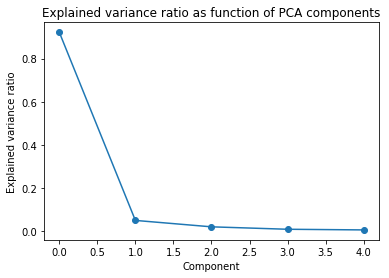

In [14]:
plt.plot(list(iris_pca.explained_variance_ratio_),'-o')
plt.title('Explained variance ratio as function of PCA components')
plt.ylabel('Explained variance ratio')
plt.xlabel('Component')
plt.show()

In [15]:
reduction_pca = PCA(n_components=2)
reduced_features = reduction_pca.fit_transform(features)

In [16]:
from sklearn.cluster import KMeans

In [17]:
km = KMeans(n_clusters=3)                 ##5 IS THE K
clusters = km.fit(reduced_features)       ##INITIALIZE

In [18]:
clusters   

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

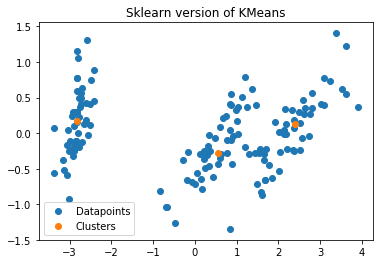

In [19]:
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], label='Datapoints')
plt.scatter(clusters.cluster_centers_[:, 0], clusters.cluster_centers_[:, 1], label='Clusters')
plt.title("Sklearn version of KMeans")
plt.legend()
plt.show()

In [20]:
reduced_features.shape

(150, 2)

In [21]:
clusters.cluster_centers_

array([[ 0.5475431 , -0.27339509],
       [-2.82444151,  0.17263589],
       [ 2.38728279,  0.12464139]])

In [22]:
from kmeans_numpy import *

In [23]:
kmm = KMeans_numpy(n_clusters=3, tolerance=0.00001)

In [24]:
clusters, clustered_data = kmm.fit(reduced_features)


In [25]:
clusters = np.array(clusters)

In [26]:
cluster_one_data = np.array(clustered_data[0])
cluster_two_data = np.array(clustered_data[1])
cluster_three_data = np.array(clustered_data[2])

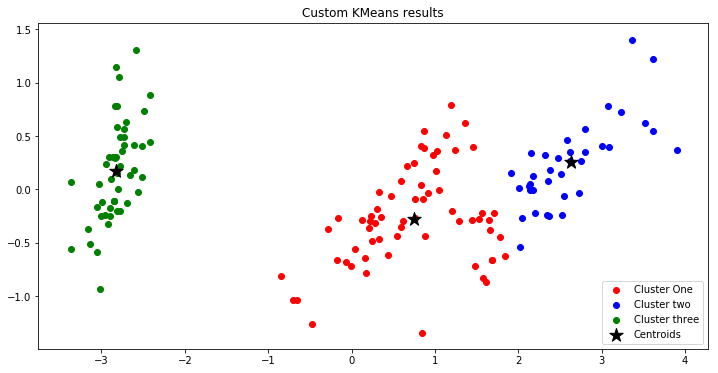

In [27]:
plt.figure(figsize=(12, 6))
plt.scatter(cluster_one_data[:, 0], cluster_one_data[:, 1], c='r', label='Cluster One')
plt.scatter(cluster_two_data[:, 0], cluster_two_data[:, 1], c='b', label='Cluster two')
plt.scatter(cluster_three_data[:, 0], cluster_three_data[:, 1], c='g', label='Cluster three')
plt.scatter(clusters[:, 0], clusters[:, 1], marker='*', s=200, color='black', label='Centroids')
plt.title("Custom KMeans results")
plt.legend()
plt.show()

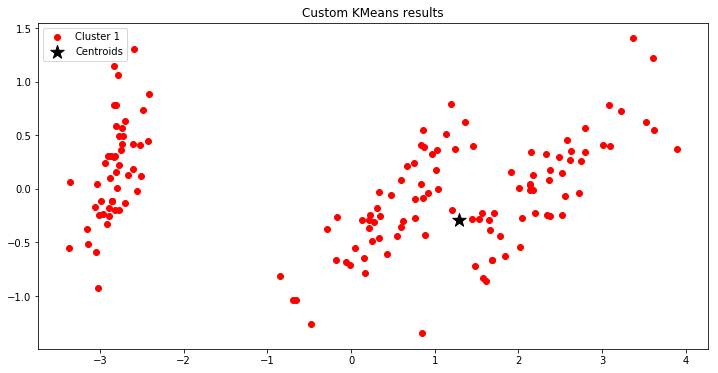

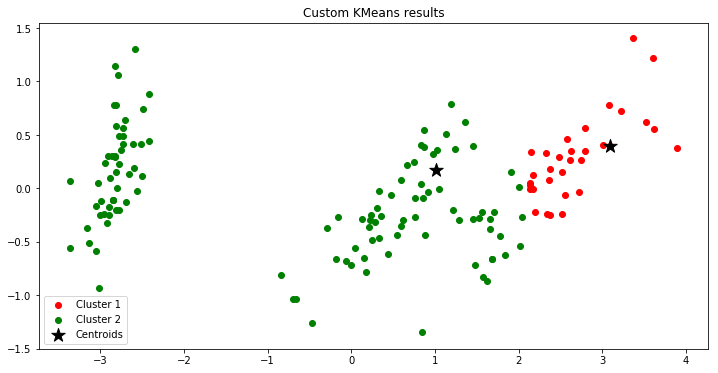

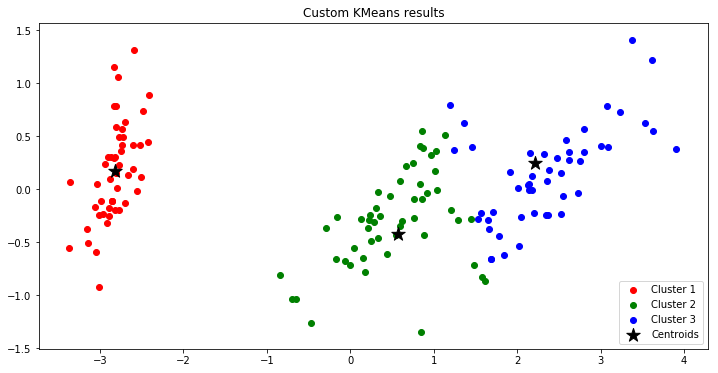

This experiment took: 0.49440813064575195 seconds with custom algorithm


In [29]:
import time

plot_colors = ['red', 'green', 'blue']
start = time.time()
for i in range(1, 4):
    test = KMeans_numpy(n_clusters=i, tolerance=0.00001)
    clust, clust_data = test.fit(reduced_features)
    clust = np.array(clust)
    plt.figure(figsize=(12, 6))
    for key in clust_data.keys():
        plt.scatter(np.array(clust_data[key])[:, 0], np.array(clust_data[key])[:, 1], color=plot_colors[key], label='Cluster {}'.format(key+1))
    
    plt.scatter(clust[:, 0], clust[:, 1], marker='*', s=200, color='black', label='Centroids')
    plt.title("Custom KMeans results")
    plt.legend()
    plt.show()
    
end = time.time()
print("This experiment took: {} seconds with custom algorithm".format(end-start))